In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
## There is no missing values in the dataset

<AxesSubplot: >

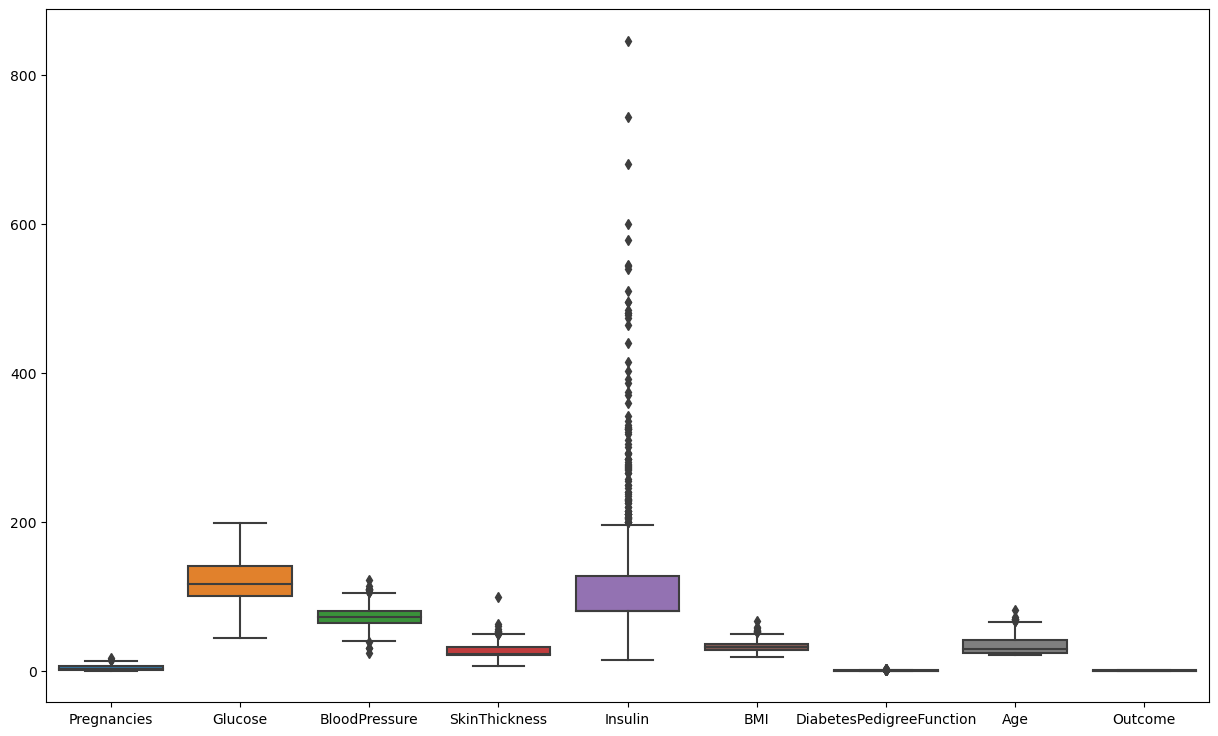

In [9]:
plt.figure(figsize=(15,9))
sns.boxplot(df)

In [10]:
#### Yes , there is a outliers in the dataset 

In [11]:
import numpy as np

In [12]:
minimum , Q1 , Q2 , Q3 , maximum = np.percentile(df['Insulin'] , [0,0.25,0.5,0.75,100])

In [13]:
minimum , Q1 , Q2 , Q3 , maximum

(14.0, 15.9175, 18.0, 22.752499999999998, 846.0)

In [14]:
IQR = Q3-Q1

In [15]:
IQR

6.834999999999997

In [16]:
lower_ference = Q1-1.5*(IQR)
higher_ference = Q3 + 1.5*(IQR)

In [17]:
lower_ference , higher_ference

(5.6650000000000045, 33.004999999999995)

In [18]:
outliers = []
for i in df['Insulin']:
    if i >= 5.6665 and i <= 33.0049 :
        
        print('These are not outliers')
        
    else:
        outliers.append(i)
    

These are not outliers
These are not outliers
These are not outliers
These are not outliers
These are not outliers
These are not outliers
These are not outliers
These are not outliers
These are not outliers
These are not outliers
These are not outliers


In [19]:
len(outliers)

757

In [20]:
df['Insulin']

0       79.799479
1       79.799479
2       79.799479
3       94.000000
4      168.000000
          ...    
763    180.000000
764     79.799479
765    112.000000
766     79.799479
767     79.799479
Name: Insulin, Length: 768, dtype: float64

In [21]:
continous_calls = ['Insulin']
for col in continous_calls:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    l=Q1-1.5*IQR
    h=Q3+1.5*IQR
    print("[",l,",",h,"]")
    df = df[(df[col] <= h)]
    df = df[(df[col] >=l)]

[ 8.623697916666671 , 198.42578125 ]


In [22]:
df['Insulin'] = df['Insulin']

In [23]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<AxesSubplot: >

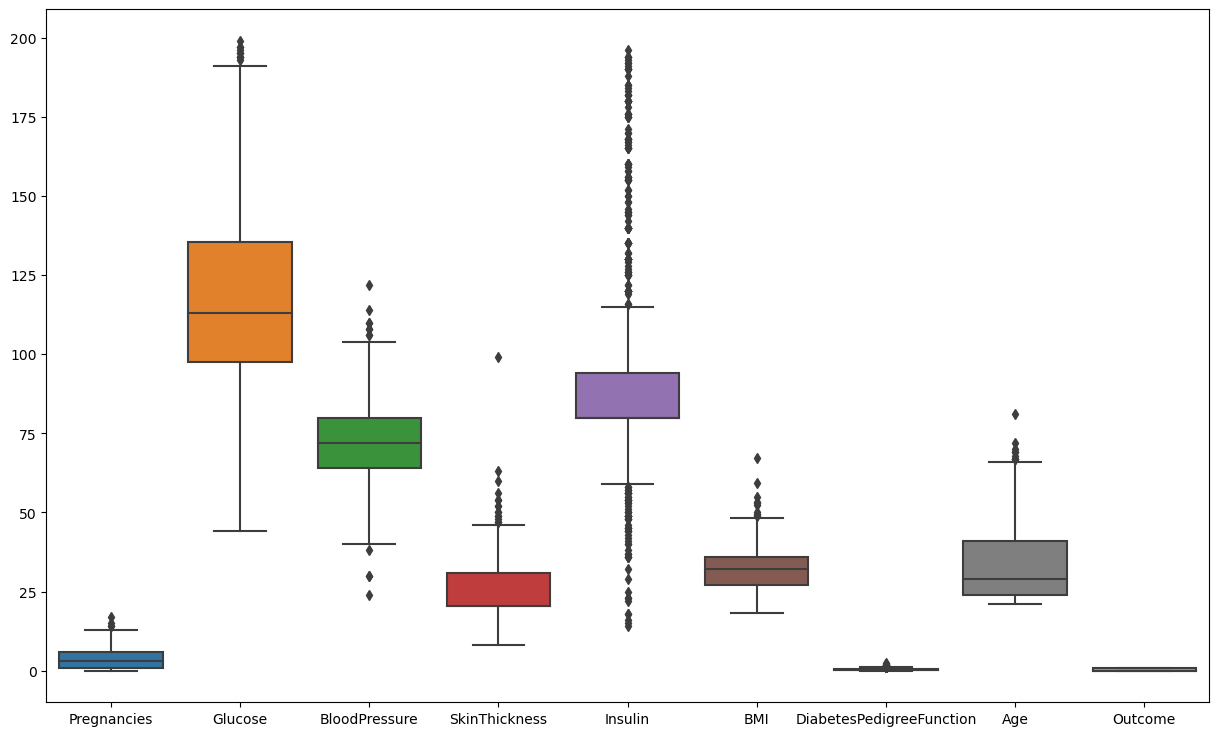

In [24]:
plt.figure(figsize=(15,9))
sns.boxplot(df)

In [25]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [26]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [28]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 679, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33333 , random_state=42)

In [30]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((452, 8), (227, 8), (452,), (227,))

In [31]:
from  sklearn.tree import DecisionTreeClassifier

In [32]:
treeclass = DecisionTreeClassifier()

In [33]:
treeclass.fit(X_train , y_train)

DecisionTreeClassifier()

In [34]:
y_pred = treeclass.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score ,confusion_matrix , roc_curve

In [36]:
a = accuracy_score(y_pred , y_test)

In [37]:
a

0.7268722466960352

In [38]:
r = recall_score(y_pred , y_test)

In [39]:
r

0.5694444444444444

In [40]:
p = precision_score(y_pred , y_test)

In [41]:
p

0.5694444444444444

In [42]:
f = f1_score(y_pred , y_test)

In [43]:
f

0.5694444444444444

In [44]:
c = confusion_matrix(y_pred , y_test)

In [45]:
c

array([[124,  31],
       [ 31,  41]])

In [46]:
roc = roc_curve(y_pred , y_test)

In [47]:
roc

(array([0. , 0.2, 1. ]),
 array([0.        , 0.56944444, 1.        ]),
 array([2, 1, 0]))

<Figure size 1500x900 with 0 Axes>

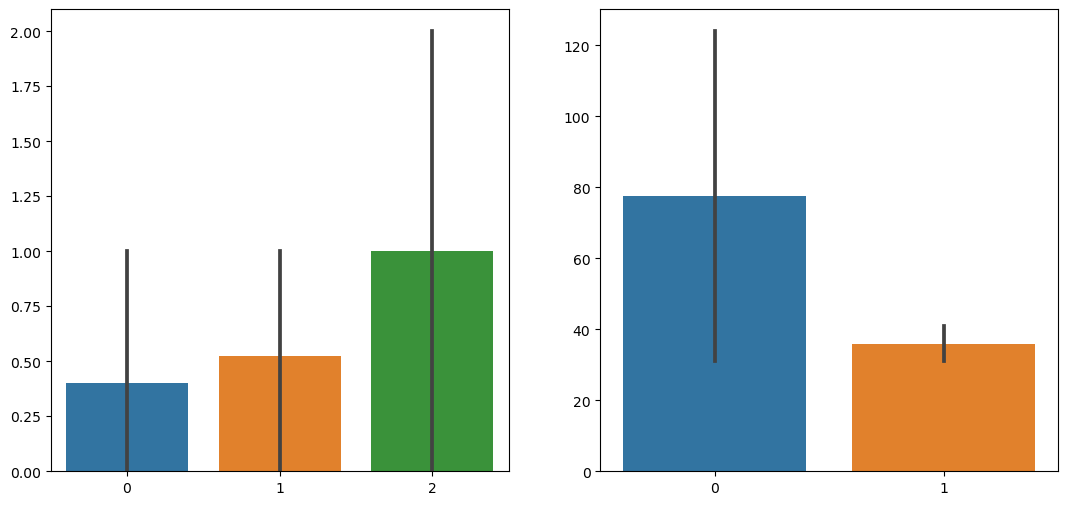

In [48]:
plt.figure(figsize=(15,9))
plt.subplots(1,2 ,figsize=(13,6))
plt.subplot(121)
sns.barplot(roc)
plt.subplot(122)
sns.barplot(c)
plt.show()

In [49]:
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [50]:
from sklearn.tree import DecisionTreeClassifier
treeclass = DecisionTreeClassifier()

In [51]:
parameters = {'criterion' : ['gini', 'entropy', 'log_loss'] , 'splitter' : ['best', 'random'] , 'max_depth' : [1,2,3,4,5,6,7,8,9] , 'max_features' : ['auto', 'sqrt', 'log2'] }

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
clf = GridSearchCV(treeclass , param_grid=parameters , cv=5 , scoring='accuracy')

In [54]:
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [55]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [59]:
from sklearn import tree

[Text(0.4409090909090909, 0.9285714285714286, 'x[1] <= 123.5\ngini = 0.442\nsamples = 452\nvalue = [303, 149]'),
 Text(0.18863636363636363, 0.7857142857142857, 'x[7] <= 28.5\ngini = 0.275\nsamples = 285\nvalue = [238, 47]'),
 Text(0.10909090909090909, 0.6428571428571429, 'x[5] <= 49.1\ngini = 0.133\nsamples = 168\nvalue = [156, 12]'),
 Text(0.09090909090909091, 0.5, 'x[5] <= 31.4\ngini = 0.113\nsamples = 166\nvalue = [156, 10]'),
 Text(0.03636363636363636, 0.35714285714285715, 'x[6] <= 0.672\ngini = 0.021\nsamples = 96\nvalue = [95, 1]'),
 Text(0.01818181818181818, 0.21428571428571427, 'gini = 0.0\nsamples = 84\nvalue = [84, 0]'),
 Text(0.05454545454545454, 0.21428571428571427, 'x[5] <= 23.55\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.03636363636363636, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.07272727272727272, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.14545454545454545, 0.35714285714285715, 'x[6] <= 1.272\ngini = 0.224\nsamples = 70\nvalue = [61, 9]'),
 Text(0

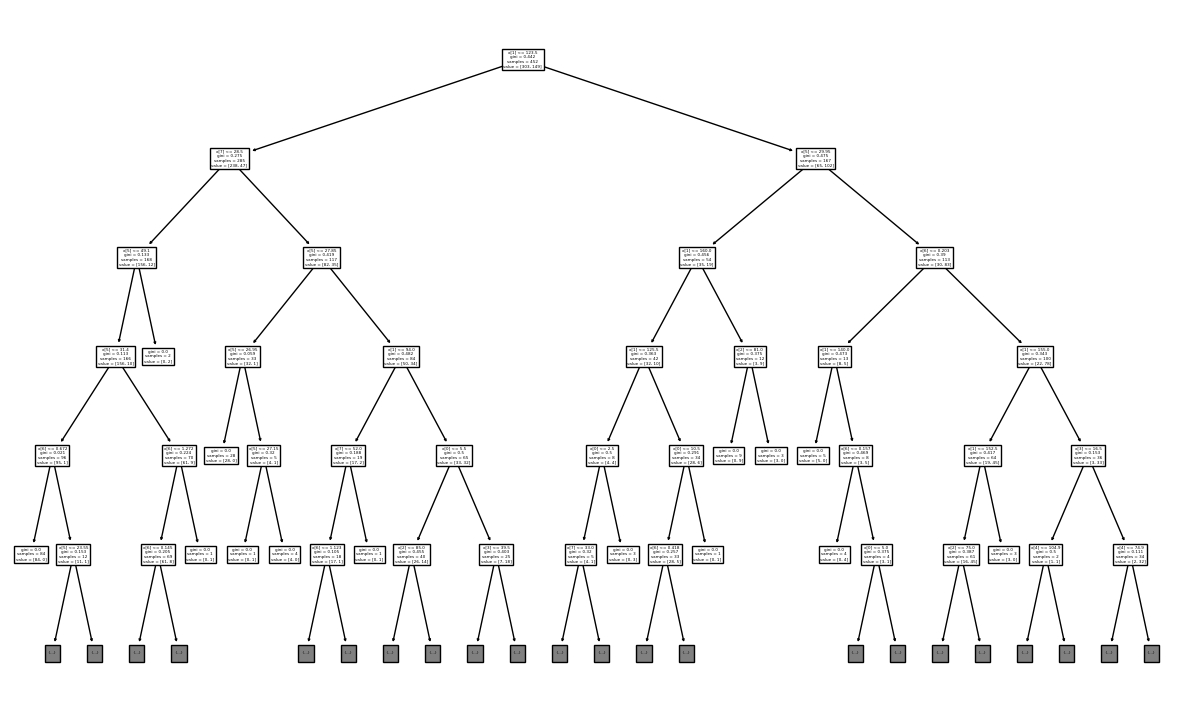

In [65]:
plt.figure(figsize=(15,9))
tree.plot_tree(treeclass , max_depth=5 )